# R Script

### Assignment 6.2: Histogram, Boxplot, Bullet Chart, Parallel Coordinate

#### DSC640
Taniya Adhikari

In [35]:
library(ggplot2)
library(readxl)
library(scales)
library(plyr)
library(dplyr)
library(ggrepel)
library(reshape2)

In [7]:
birthrates <- read.csv('birth-rate.csv')
head(birthrates)

Country,X1960,X1961,X1962,X1963,X1964,X1965,X1966,X1967,X1968,...,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008
Aruba,36.40000,35.179,33.863,32.459,30.994,29.51300,28.069,26.721,25.518,...,15.02400,14.5280,14.04100,13.57900,13.15300,12.77200,12.44100,12.15900,11.91900,11.71600
Afghanistan,52.20100,52.206,52.208,52.204,52.192,52.16800,52.130,52.076,52.006,...,51.22900,50.9030,50.48600,49.98400,49.41600,48.80300,48.17700,47.57500,47.02300,46.53800
Angola,54.43200,54.394,54.317,54.199,54.040,53.83600,53.585,53.296,52.984,...,48.66200,48.3550,48.00500,47.54500,46.93600,46.18400,45.33000,44.44400,43.60700,42.87500
Albania,40.88600,40.312,39.604,38.792,37.913,37.00800,36.112,35.245,34.421,...,17.71300,16.8500,16.08100,15.44400,14.96200,14.64400,14.48500,14.46400,14.53400,14.64900
Netherlands Antilles,32.32100,30.987,29.618,28.229,26.849,25.51800,24.280,23.173,22.230,...,15.80900,15.4120,15.09600,14.82400,14.56500,14.30900,14.05100,13.79000,13.53200,13.28100
Arab World,47.61122,NA,NA,NA,NA,46.57288,NA,NA,NA,...,29.07314,28.6828,28.30524,27.96244,27.67007,27.37897,27.11886,26.85532,26.59352,26.32405


### R - Histogram

Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

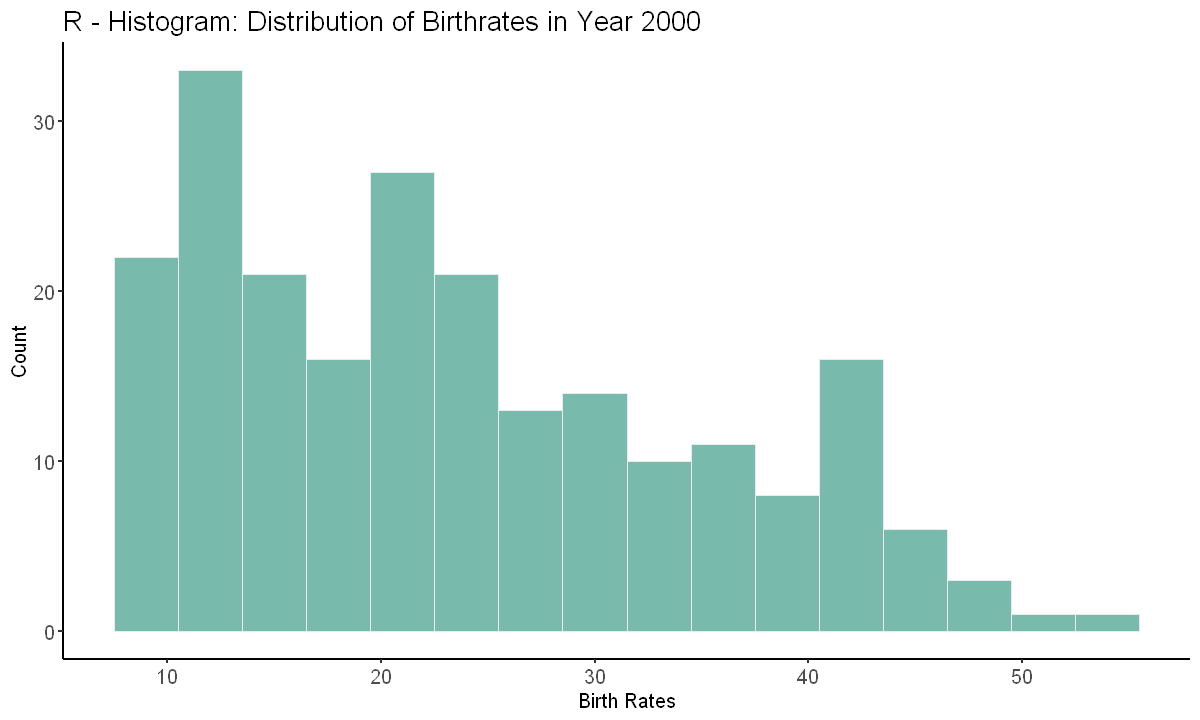

In [21]:
options(repr.plot.width =10, repr.plot.height =6)

# plot
p <- birthrates %>%
  ggplot( aes(x=X2000)) +
    geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Bin size = 30")
p + theme_classic() +
  theme(text = element_text(family="sans",size =12, color="black"), element_line(size = .6), 
         plot.title = element_text(size = 16), axis.text.x = element_text(size=12), 
         axis.text.y = element_text(size=12))+
ylab("Count") +
xlab("Birth Rates") +
  ggtitle("R - Histogram: Distribution of Birthrates in Year 2000")


### R - Bubble Chart

In [33]:
dt <-birthrates %>% 
            filter(Country %in% c('India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan', 'Sri Lanka'))

In [40]:
dt2 <- melt(dt)
head(dt2)

Using Country as id variables


Country,variable,value
Afghanistan,X1960,52.201
Bangladesh,X1960,47.258
Bhutan,X1960,47.945
India,X1960,47.580
Sri Lanka,X1960,36.046
Maldives,X1960,41.741


Warning message:
"Removed 36 rows containing non-finite values (stat_boxplot)."

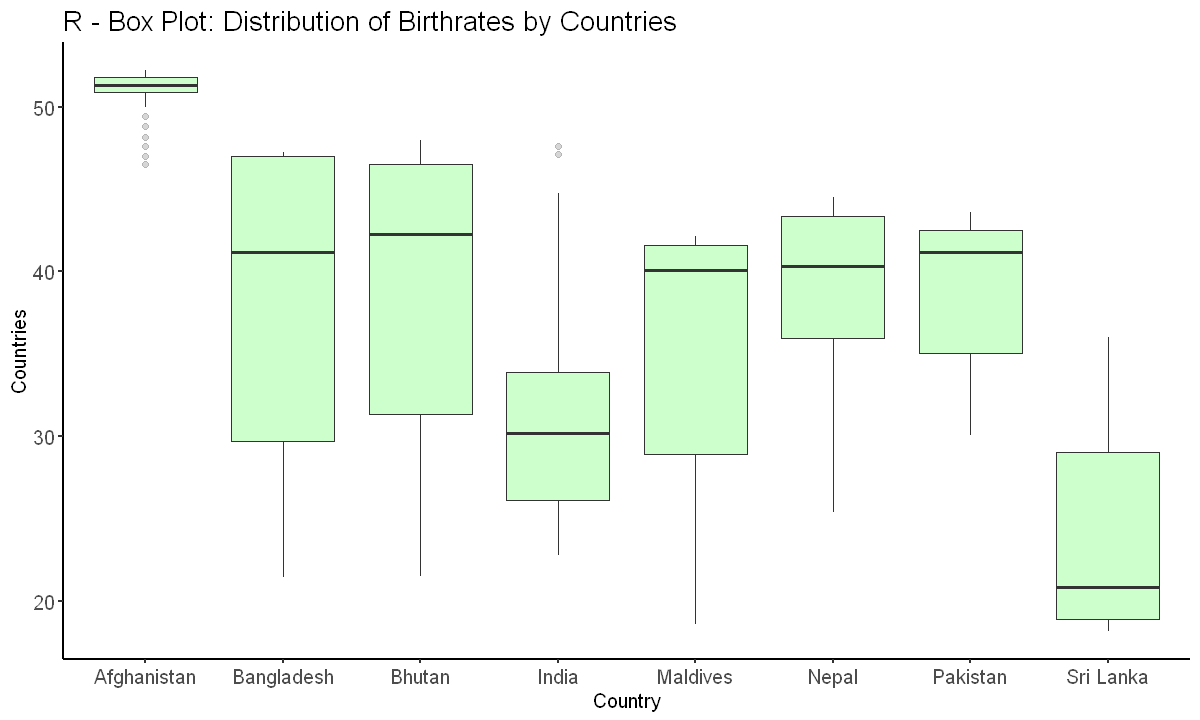

In [51]:
ggplot(dt2, aes(x=Country, y=value)) +
    geom_boxplot(fill='green', alpha=.2) +
theme_classic() +
  theme(text = element_text(family="sans",size =12, color="black"), element_line(size = .6), 
         plot.title = element_text(size = 16), axis.text.x = element_text(size=12), 
         axis.text.y = element_text(size=12))+
ylab("BirthRates") + 
ylab("Countries") + 
ggtitle("R - Box Plot: Distribution of Birthrates by Countries")

### R - Density Plot

In [54]:
dt3 <-dt2 %>% 
            filter(variable %in% c('X1990', 'X2000'))

In [59]:
dt4<-transform(dt3,width=ifelse(variable=="X1990",.8,.4))

Warning message:
"position_stack requires non-overlapping x intervals"

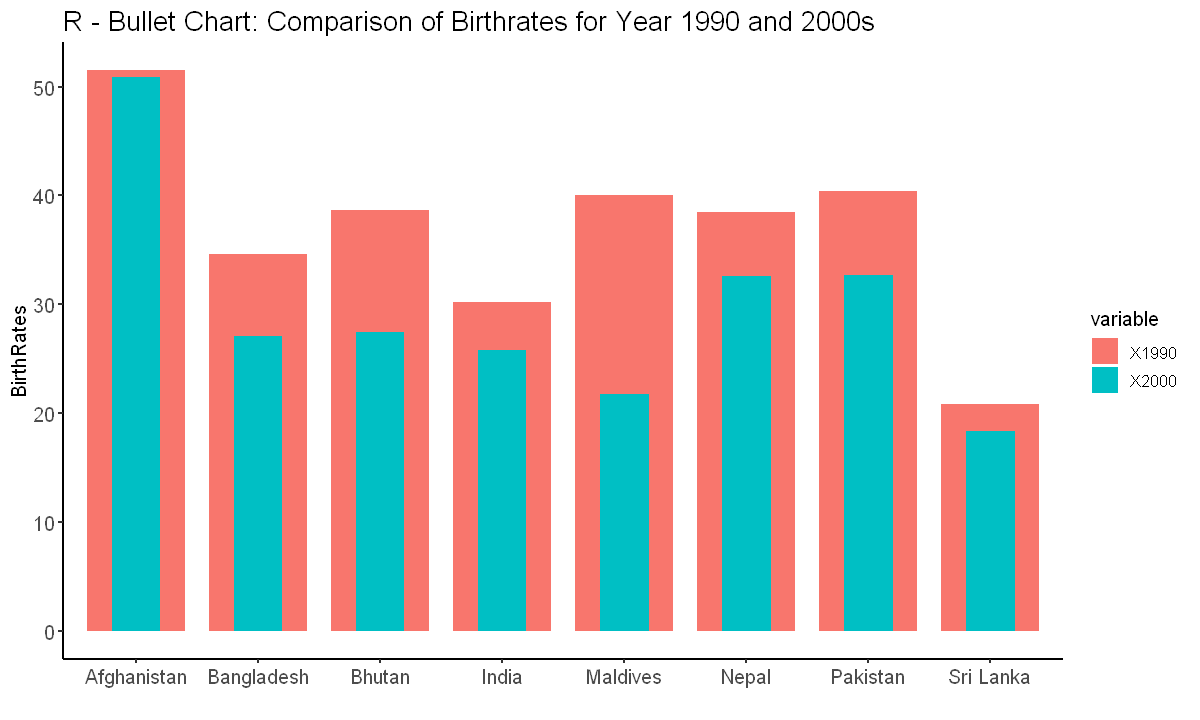

In [68]:
gg <- ggplot(dt4)
gg <- gg + geom_bar(aes(Country, value, fill=variable), width=dt4$width, stat="identity")
gg <- gg + xlab("") + ylab("")+
theme_classic() +
  theme(text = element_text(family="sans",size =12, color="black"), element_line(size = .6), 
         plot.title = element_text(size = 16), axis.text.x = element_text(size=12), 
         axis.text.y = element_text(size=12))+
ylab("BirthRates") + 
ggtitle("R - Bullet Chart: Comparison of Birthrates for Year 1990 and 2000s")


print(gg)


## R - Lolliop Chart

In [65]:
dt5 <-dt3 %>% 
            filter(variable %in% c('X2000'))

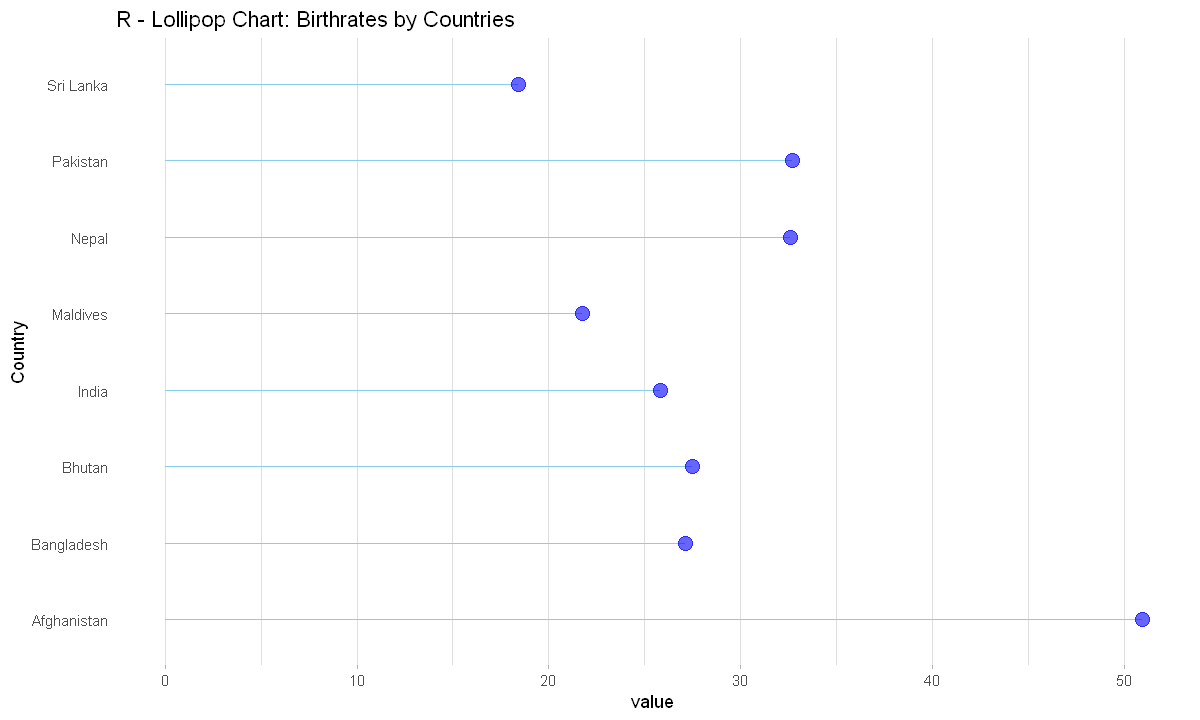

In [69]:
# Horizontal version
ggplot(dt5, aes(Country, y=value)) +
  geom_segment( aes(x=Country, xend=Country, y=0, yend=value), color="skyblue") +
  geom_point( color="blue", size=4, alpha=0.6) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  )+
ggtitle("R - Lollipop Chart: Birthrates by Countries")